In [0]:
pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 64.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 115.2 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15548 sha256=4ff46c9d4695ab7cccadfcb3a4d89f93a7f1ea738544c23542a0eb4a2d78dd24
  Stored in directory: /home/spark-877e9530-6374-4ea8-980c-a1/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.3-cp312-cp312-linux_aarch64.whl size=909445 sha256=53cd9ffc

### Importar librerias

In [0]:
import yfinance as yf 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Cargar base de datos

In [0]:
#Definicion base de datos
def df_yf_tidy( 

    tickers, 

    start=None, 

    end=None, 

    interval="1d", 

    auto_adjust=False,  # Se mantiene False para conservar "Adj Close" y así mantener las 6 columnas 

): 

    """ 

    Devuelve un DataFrame 'largo' con múltiples tickers     

    Índice por fecha y columna 'Ticker' para identificar. 

    """ 

    cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"] 

    frames = [] 

 

    for t in tickers: 

        h = yf.Ticker(t).history( 

            start=start, end=end, interval=interval, auto_adjust=auto_adjust 

        ) 

        if h.empty: 

            continue 

        for c in cols: 

            if c not in h.columns: 

                h[c] = pd.NA 

        out = h[cols].copy() 

        out["Ticker"] = t 

        frames.append(out.reset_index())  # 'Date' pasa a columna 

 

    if not frames: 

        return pd.DataFrame(columns=["Date"] + cols + ["Ticker"]) 

 

    df = pd.concat(frames, ignore_index=True) 

    # Orden de columnas 

    df = df[["Date"] + cols + ["Ticker"]] 

    return df 

 

#Uso para crear base de datos. 

tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "META"] 

df = df_yf_tidy(tickers, start="2000-01-01", end="2025-10-25", interval="1d") 

 


# Variación relativa 

df["variacion_relativa"] = df["Adj Close"] / df["Adj Close"].shift(1) 

# Variación porcentual (en %) 

df["variacion_porcentual"] = (df["Adj Close"].pct_change()) * 100 

# Variación logarítmica (en valores decimales) 

df["variacion_logaritmica"] = np.log(df["Adj Close"]).diff() 

df.tail() 

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,variacion_relativa,variacion_porcentual,variacion_logaritmica
28184,2025-10-20 00:00:00-04:00,721.190002,733.770020,720.179993,732.169983,732.169983,8900200,META,1.021272,2.127155,0.021048
28185,2025-10-21 00:00:00-04:00,736.020020,738.500000,728.750000,733.270020,733.270020,7647300,META,1.001502,0.150243,0.001501
28186,2025-10-22 00:00:00-04:00,733.830017,740.599976,724.030029,733.409973,733.409973,8734500,META,1.000191,0.019086,0.000191
28187,2025-10-23 00:00:00-04:00,734.700012,742.409973,733.099976,734.000000,734.000000,9856000,META,1.000804,0.080450,0.000804
28188,2025-10-24 00:00:00-04:00,736.789978,741.210022,731.150024,738.359985,738.359985,9151300,META,1.005940,0.594003,0.005922


### Informacion de la base de datos

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28189 entries, 0 to 28188
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype                           
---  ------                 --------------  -----                           
 0   Date                   28189 non-null  datetime64[ns, America/New_York]
 1   Open                   28189 non-null  float64                         
 2   High                   28189 non-null  float64                         
 3   Low                    28189 non-null  float64                         
 4   Close                  28189 non-null  float64                         
 5   Adj Close              28189 non-null  float64                         
 6   Volume                 28189 non-null  int64                           
 7   Ticker                 28189 non-null  object                          
 8   variacion_relativa     28188 non-null  float64                         
 9   variacion_porcentual   28188 non-null  

### Estadisticas de la base de datos

In [0]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,variacion_relativa,variacion_porcentual,variacion_logaritmica
count,28189.000000,28189.000000,28189.000000,28189.000000,28189.000000,2.818900e+04,28188.000000,28188.000000,28188.000000
mean,82.316369,83.236710,81.383480,82.337855,80.065069,1.492672e+08,1.000870,0.086967,0.000240
std,112.553322,113.776059,111.260278,112.554303,112.415148,2.375137e+08,0.026569,2.656924,0.048823
min,0.231964,0.235536,0.227143,0.234286,0.196932,4.726100e+06,0.008535,-99.146550,-4.763638
25%,12.104104,12.236429,11.990490,12.103214,11.659500,3.404760e+07,0.990680,-0.932029,-0.009364
50%,31.080000,31.440001,30.709999,31.100000,27.004253,6.828080e+07,1.000690,0.068964,0.000689
75%,122.010002,123.370003,120.550003,122.118500,120.488998,1.475880e+08,1.011529,1.152881,0.011463
max,791.150024,796.250000,780.820007,790.000000,789.467163,7.421641e+09,1.344714,34.471362,0.296181


### Histograma

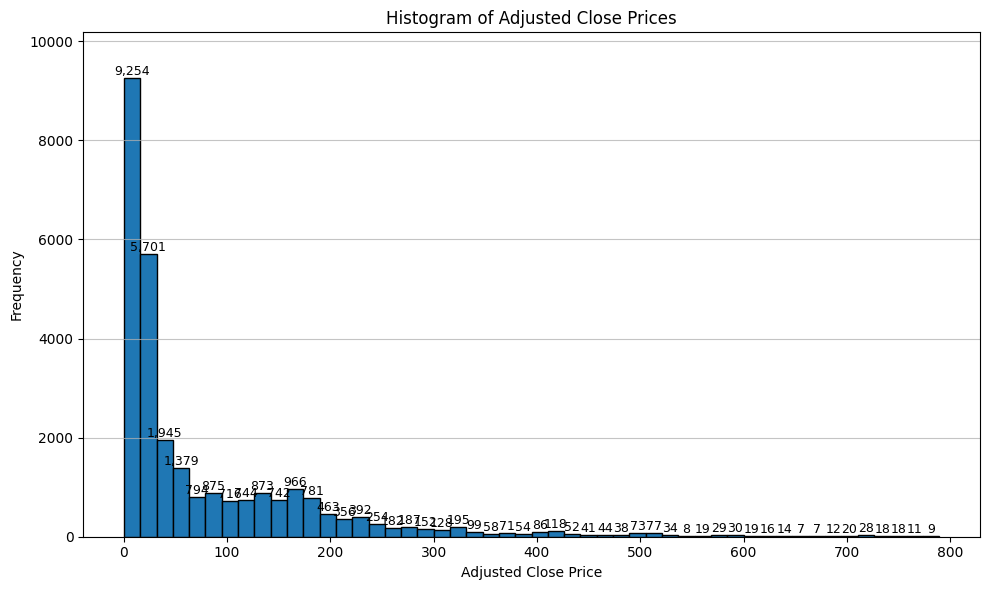

In [0]:
#  Histograma con conteos
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['Adj Close'].dropna(), bins=50, edgecolor='black')

# Margen superior para que quepan las etiquetas
plt.ylim(0, max(n)*1.10 if len(n) else 1)

# Etiquetas de conteo encima de cada barra
for count, patch in zip(n, patches):
    if count <= 0:
        continue
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_height()
    # Formato con separador de miles
    label = f"{int(round(count)):,}"
    plt.text(x, y, label, ha='center', va='bottom', fontsize=9, rotation=0, clip_on=True)

plt.title('Histogram of Adjusted Close Prices')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

### Boxplot

/home/spark-877e9530-6374-4ea8-980c-a1/.ipykernel/2491/command-5552245223557990-2721356922:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data, labels=orden, showfliers=True)


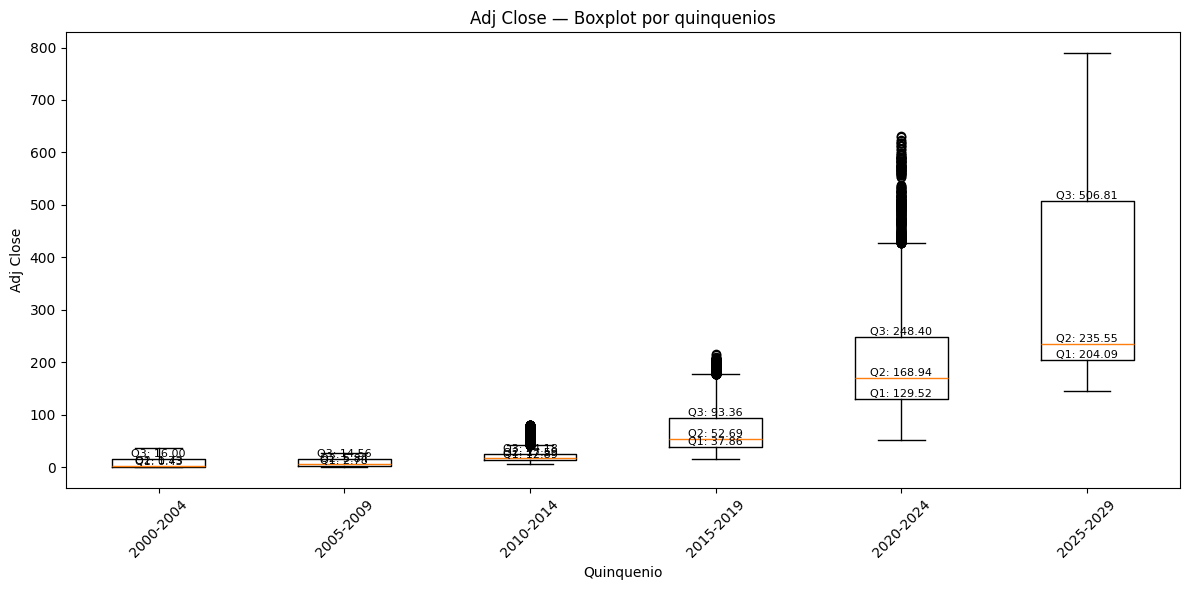

In [0]:
# Asegurar tipos y limpiar
df_ = df.copy()
df_["Date"] = pd.to_datetime(df_["Date"], errors="coerce")
df_ = df_.dropna(subset=["Date", "Adj Close"])

# (Opcional) si tu DF es "largo" y quieres un solo ticker:
# df_ = df_[df_["Ticker"] == "AAPL"]

# Construir etiqueta de quinquenio: 2000-2004, 2005-2009, etc.
years = df_["Date"].dt.year
q_start = (years // 5) * 5
df_["Quinquenio"] = q_start.astype(str) + "-" + (q_start + 4).astype(str)

# Orden cronológico de los quinquenios
orden = (df_.groupby("Quinquenio")["Date"].min()
         .sort_values()
         .index.tolist())

# Datos por grupo
data = [df_.loc[df_["Quinquenio"] == q, "Adj Close"].dropna().values for q in orden]

# Calcular cuartiles para anotación
q1 = []
med = []
q3 = []
for arr in data:
    if len(arr) == 0:
        q1.append(np.nan); med.append(np.nan); q3.append(np.nan)
    else:
        q1.append(np.percentile(arr, 25))
        med.append(np.percentile(arr, 50))
        q3.append(np.percentile(arr, 75))

# Graficar
plt.figure(figsize=(12, 6))
bp = plt.boxplot(data, labels=orden, showfliers=True)

plt.title("Adj Close — Boxplot por quinquenios")
plt.xlabel("Quinquenio")
plt.ylabel("Adj Close")

# Anotar Q1, Mediana (Q2) y Q3 sobre cada caja
xs = np.arange(1, len(orden) + 1)
for x, a, b, c in zip(xs, q1, med, q3):
    if not np.isnan(a):
        plt.text(x, a, f"Q1: {a:,.2f}", ha="center", va="bottom", fontsize=8)
    if not np.isnan(b):
        plt.text(x, b, f"Q2: {b:,.2f}", ha="center", va="bottom", fontsize=8)
    if not np.isnan(c):
        plt.text(x, c, f"Q3: {c:,.2f}", ha="center", va="bottom", fontsize=8)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Tendencias tickers


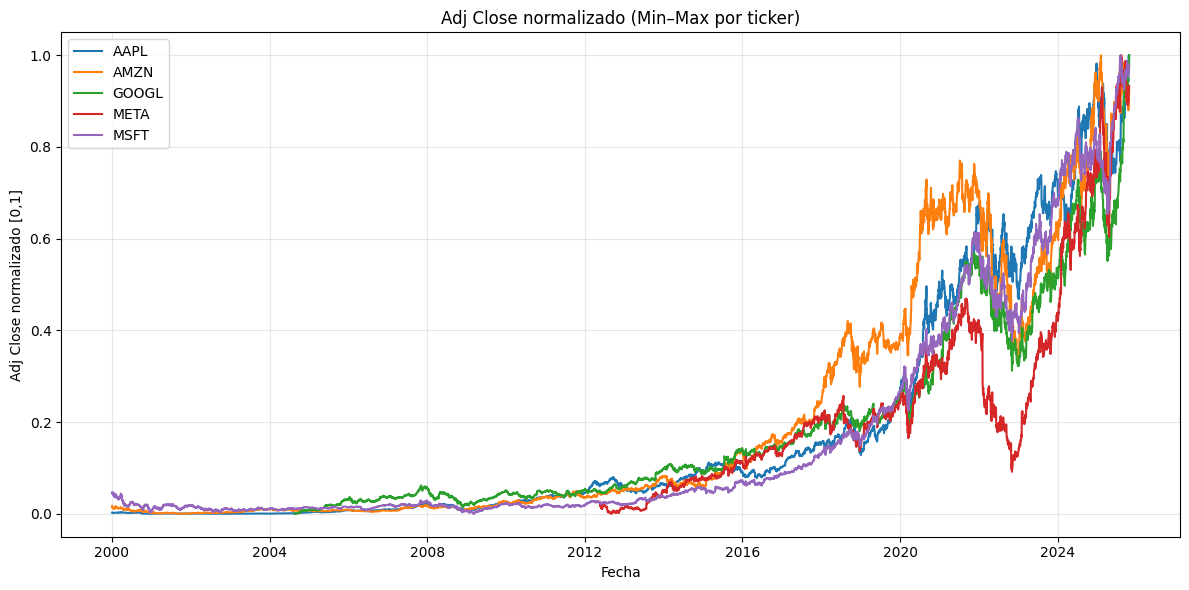

In [0]:
#Normalización 1: Min-Max por ticker a [0, 1]
def minmax_safe(s):
    s_min, s_max = s.min(), s.max()
    rng = s_max - s_min
    return (s - s_min) / rng if rng != 0 else np.zeros_like(s, dtype=float)

df_["AdjClose_minmax"] = df_.groupby("Ticker")["Adj Close"].transform(minmax_safe)

#Graficar min-max por ticker
plt.figure(figsize=(12, 6))
for t, g in df_.groupby("Ticker"):
    plt.plot(g["Date"], g["AdjClose_minmax"], label=t)
plt.title("Adj Close normalizado (Min–Max por ticker)")
plt.xlabel("Fecha")
plt.ylabel("Adj Close normalizado [0,1]")
plt.grid(True, axis="both", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
